In [ ]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
from pymongo import MongoClient
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
db_name = "Processed_Thrifty_Database"
host = "capstone-cosmos-db.mongo.cosmos.azure.com"
port = 10255
username = "capstone-cosmos-db"
password = "BuYmUjcc9LwFDN2PdVNuUudZTG5ABlxPoZgdIoRlrugcfiF5Rm15REQOJL1dspgH28NeeJI5dOeMCwzqRRrCvg=="
args = "ssl=true&retrywrites=false&ssl_cert_reqs=CERT_NONE"

In [ ]:
connection_uri = f"mongodb://{username}:{password}@{host}:{port}/{db_name}?{args}"
client = MongoClient(connection_uri)

db = client[db_name]
collection = db['Customer_Segmentation']

In [ ]:
store_eval= pd.DataFrame(list(collection.find()))
store_eval.head(2)

,_id,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Birthdate,Address,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Current_Age,Town,Latitude,Longitude,State,Transaction_Age
0,6094edbae1a88135b12d145c,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0
1,6094edbbe1a88135b12dcdaf,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0


In [ ]:
df = store_eval.groupby(by=['Item_Name'], as_index=False)['Customer_Id'].count()
df

,Item_Name,Customer_Id
0,Hoodies,45399
1,bags,45477
2,bathrobe,44853
3,blazer,45490
4,blouse,45691
5,boots,45516
6,cap,45284
7,cardigan,45464
8,coat,45435
9,dresses,45573


In [ ]:
#purchased from grouping
No_of_customer_df = store_eval.groupby(by=['Purchased_From'], as_index=False)['Customer_Id'].count()
#plot
fig = px.pie(No_of_customer_df, values='Customer_Id', names='Purchased_From', title='Purchased from Ratio',hole=.3)
fig.show()


# New section

In [ ]:
#Gender Grouping
gender_group = store_eval['Gender'].value_counts().to_frame()
gender_group = gender_group.reset_index()
gender_group = gender_group.rename(columns = {'index': 'gender', 'Gender': 'total'}, inplace = False)


#plot
fig = px.pie(gender_group, values='total', names='gender', title='Gender Ratio',hole=.3)
fig.show()

In [ ]:
#
A_df = store_eval.groupby(['Showroom_Id'])['Amount_Spent'].sum().reset_index()
#plot
fig = px.pie(A_df, values='Amount_Spent', names='Showroom_Id', title='showroom vs online ratio',hole=.3)
fig.show()

In [ ]:
q_df= store_eval.groupby(['Showroom_Id'])['Quantity_Purchased'].sum().reset_index()
#plot
fig = px.pie(q_df, values='Quantity_Purchased', names='Showroom_Id', title='Quantity Ratio',hole=.3)
fig.show()

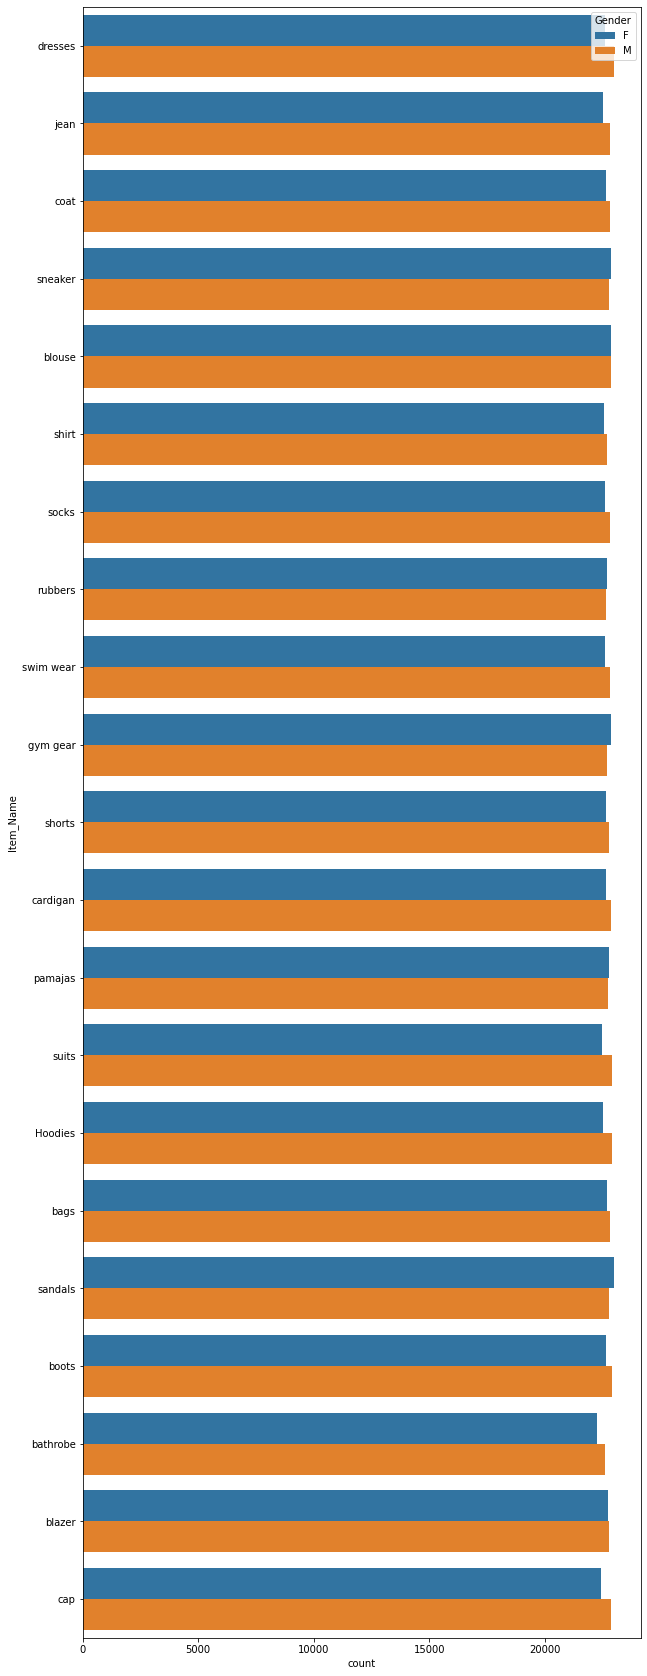

In [ ]:
##no items bought
plt.figure(figsize = (10, 30))

course = sns.countplot(y='Item_Name',hue='Gender',data=store_eval)

plt.savefig('course.png')

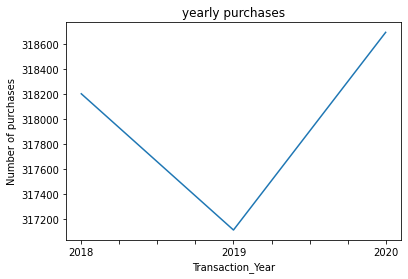

In [ ]:
store_eval.groupby("Transaction_Year")['Showroom_Id'].count().plot(kind = 'line')
plt.title('yearly purchases')
plt.ylabel('Number of purchases')
plt.show()

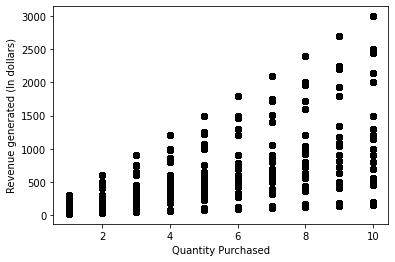

In [ ]:
X = store_eval[["Amount_Spent","Quantity_Purchased"]]
#Visualise data points
plt.scatter(X["Quantity_Purchased"],X["Amount_Spent"],c='black')
plt.xlabel('Quantity Purchased')
plt.ylabel('Revenue generated (In dollars)')
plt.show()